In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('mlsheet.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.head(10)


,timestamp,open,high,low,close,volume,close_p1,close_p2,close_p3,close_p4,close_p5,close_p6,close_p7,close_p8,close_p9,close_p10,close_p11
0,2017-01-02 09:15:00+05:30,80.83,81.00,80.83,80.90,29495,80.90,80.80,80.77,80.60,80.57,80.53,80.73,80.77,80.77,80.90,81.20
1,2017-01-02 09:16:00+05:30,80.90,80.90,80.77,80.90,25445,80.80,80.77,80.60,80.57,80.53,80.73,80.77,80.77,80.90,81.20,81.13
2,2017-01-02 09:17:00+05:30,80.87,80.93,80.77,80.80,23282,80.77,80.60,80.57,80.53,80.73,80.77,80.77,80.90,81.20,81.13,81.10
3,2017-01-02 09:18:00+05:30,80.80,80.80,80.67,80.77,31247,80.60,80.57,80.53,80.73,80.77,80.77,80.90,81.20,81.13,81.10,81.00
4,2017-01-02 09:19:00+05:30,80.77,80.80,80.53,80.60,22892,80.57,80.53,80.73,80.77,80.77,80.90,81.20,81.13,81.10,81.00,80.93
5,2017-01-02 09:20:00+05:30,80.60,80.60,80.50,80.57,22490,80.53,80.73,80.77,80.77,80.90,81.20,81.13,81.10,81.00,80.93,80.90
6,2017-01-02 09:21:00+05:30,80.53,80.57,80.47,80.53,23778,80.73,80.77,80.77,80.90,81.20,81.13,81.10,81.00,80.93,80.90,81.00
7,2017-01-02 09:22:00+05:30,80.53,80.73,80.50,80.73,27114,80.77,80.77,80.90,81.20,81.13,81.10,81.00,80.93,80.90,81.00,80.83
8,2017-01-02 09:23:00+05:30,80.73,80.87,80.73,80.77,15987,80.77,80.90,81.20,81.13,81.10,81.00,80.93,80.90,81.00,80.83,81.00
9,2017-01-02 09:24:00+05:30,80.83,80.83,80.63,80.77,25343,80.90,81.20,81.13,81.10,81.00,80.93,80.90,81.00,80.83,81.00,81.00


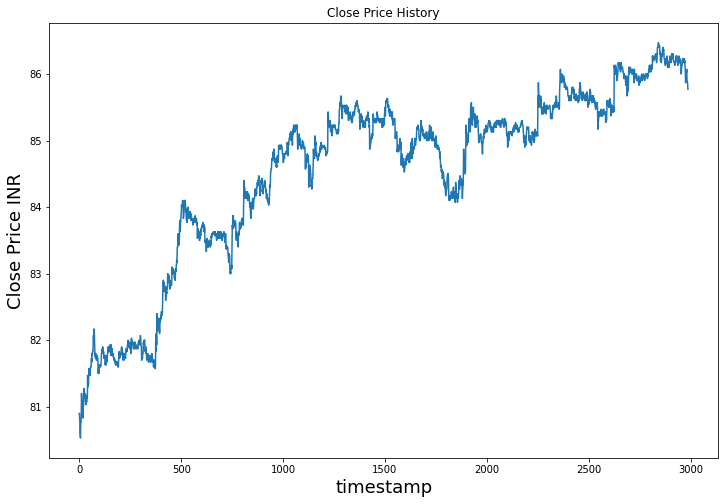

In [63]:
import seaborn as sns
plt.figure(figsize=(12,8))
plt.title('Close Price History')
plt.plot(df['close'])
#ax=sns.lineplot(data=df, x='timestamp',y='close', color="blue");
plt.xlabel('timestamp',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [21]:
data = df.drop(['close','close_p1','close_p3','close_p4','close_p5','close_p6','close_p7','close_p8','close_p9','close_p10','close_p11'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8)


TypeError: 'method' object is not subscriptable

In [12]:
dataset


array([[80.9 , 80.9 , 80.77, ..., 80.77, 80.9 , 81.2 ],
       [80.9 , 80.8 , 80.6 , ..., 80.9 , 81.2 , 81.13],
       [80.8 , 80.77, 80.57, ..., 81.2 , 81.13, 81.1 ],
       ...,
       [85.87, 85.8 , 85.77, ..., 85.6 , 85.53, 85.53],
       [85.8 , 85.77, 85.77, ..., 85.53, 85.53, 85.53],
       [85.77, 85.77, 85.73, ..., 85.53, 85.53, 85.6 ]])

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [13]:
train_data = scaled_data[0:training_data_len  , : ]
x_train=[]
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

x_train

[array([0.06228956, 0.06228956, 0.04545455, 0.04040404, 0.01178451,
        0.00673401, 0.        , 0.03367003, 0.04040404, 0.04040404,
        0.06228956, 0.11279461, 0.1010101 , 0.0959596 , 0.07912458,
        0.06734007, 0.06228956, 0.07912458, 0.05050505, 0.07912458,
        0.07912458, 0.08417508, 0.12457912, 0.11279461, 0.12457912,
        0.1010101 , 0.10774411, 0.1010101 , 0.10774411, 0.11279461,
        0.1010101 , 0.09090909, 0.1010101 , 0.08417508, 0.10774411,
        0.0959596 , 0.09090909, 0.0959596 , 0.1010101 , 0.1010101 ,
        0.10774411, 0.15824916, 0.13468013, 0.12962963, 0.14646465,
        0.13468013, 0.15151515, 0.17508418, 0.16835017, 0.16329966,
        0.17508418, 0.16835017, 0.16835017, 0.15824916, 0.17508418,
        0.18013468, 0.18013468, 0.18013468, 0.18013468, 0.19191919]),
 array([0.06228956, 0.04545455, 0.04040404, 0.01178451, 0.00673401,
        0.        , 0.03367003, 0.04040404, 0.04040404, 0.06228956,
        0.11279461, 0.1010101 , 0.0959596 , 0.

In [17]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.06228956, 0.06228956, 0.04545455, ..., 0.18013468, 0.18013468,
        0.19191919],
       [0.06228956, 0.04545455, 0.04040404, ..., 0.18013468, 0.19191919,
        0.2020202 ],
       [0.04545455, 0.04040404, 0.01178451, ..., 0.19191919, 0.2020202 ,
        0.19191919],
       ...,
       [0.84175084, 0.83670034, 0.83670034, ..., 0.88720539, 0.88720539,
        0.89225589],
       [0.83670034, 0.83670034, 0.84175084, ..., 0.88720539, 0.89225589,
        0.88215488],
       [0.83670034, 0.84175084, 0.83670034, ..., 0.89225589, 0.88215488,
        0.88720539]])

In [69]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=11))

In [70]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [71]:
model.fit(x_train, y_train, batch_size=124, epochs=5)

Epoch 1/5
19/19 [==============================] - 4s 81ms/step - loss: 0.2651
Epoch 2/5
19/19 [==============================] - 2s 79ms/step - loss: 0.0196
Epoch 3/5
19/19 [==============================] - 2s 82ms/step - loss: 0.0045
Epoch 4/5
19/19 [==============================] - 1s 71ms/step - loss: 0.0013
Epoch 5/5
19/19 [==============================] - 2s 81ms/step - loss: 8.4909e-04


In [72]:
test_data = scaled_data[training_data_len - 60: , : ]#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [73]:
x_test = np.array(x_test)

In [74]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [86]:
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions)


In [79]:
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

0.2625613085251247

In [ ]:
train = data[:training_data_len]
display = data[training_data_len:]

display['Predictions'] = predictions[]
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.plot(train['close'])
plt.plot(display['close'])
plt.plot(display['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

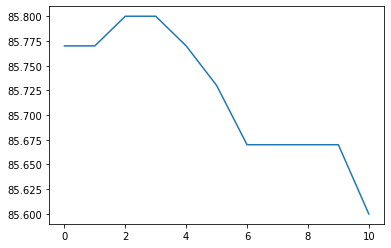

In [105]:
plt.plot(y_test[4])
plt.show()

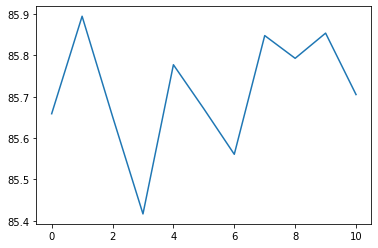

In [110]:
plt.plot(predictions[4])
plt.show()

In [111]:
print(predictions[4])
print(x_test[4])

[85.65883  85.89455  85.652306 85.416595 85.777275 85.67074  85.56077
 85.84779  85.792816 85.85372  85.70517 ]
[[0.84175084]
 [0.83670034]
 [0.83670034]
 [0.84848485]
 [0.85353535]
 [0.85353535]
 [0.86531987]
 [0.85353535]
 [0.85353535]
 [0.84175084]
 [0.83670034]
 [0.83670034]
 [0.84175084]
 [0.83670034]
 [0.84175084]
 [0.83670034]
 [0.84175084]
 [0.84848485]
 [0.84848485]
 [0.83164983]
 [0.83164983]
 [0.83670034]
 [0.87542088]
 [0.89225589]
 [0.9040404 ]
 [0.92087542]
 [0.93265993]
 [0.91582492]
 [0.90909091]
 [0.90909091]
 [0.8989899 ]
 [0.9040404 ]
 [0.8989899 ]
 [0.92087542]
 [0.91582492]
 [0.91582492]
 [0.90909091]
 [0.90909091]
 [0.9040404 ]
 [0.90909091]
 [0.9040404 ]
 [0.91582492]
 [0.91582492]
 [0.8989899 ]
 [0.90909091]
 [0.90909091]
 [0.88720539]
 [0.8989899 ]
 [0.89225589]
 [0.88720539]
 [0.88720539]
 [0.88720539]
 [0.89225589]
 [0.88215488]
 [0.88720539]
 [0.88720539]
 [0.88215488]
 [0.88215488]
 [0.88720539]
 [0.88720539]]


In [92]:
y_test[0]

array([85.77, 85.77, 85.8 , 85.8 , 85.77, 85.73, 85.67, 85.67, 85.67,
       85.67, 85.6 ])

In [ ]:
_